<center><h1>Data Analysis Portion</h1></center>

## Contents:
1. [Data Cleaning](#Data-Cleaning) 
2. [EPA](#Exploratory-Data-Analysis)
3. [Model Creation](#Model-Creation)


<center><h1>Data Cleaning</h1></center>

In this step, I prepare the data to make it ready for visualization.

In [31]:
import pandas as pd
import numpy as np

In [33]:
DATASET_PATH = "../data/output.csv"
COLUMN_NAMES = ['price', 'year_model', 'mileage', 'fuel_type', 'mark', 'model', 'fiscal_power', 'sector', 'type', 'city'] 
df = pd.read_csv(DATASET_PATH, names=COLUMN_NAMES)
df.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
0,135 000 DH,Année-Modèle:2013,Kilométrage:160 000 - 169 999,Type de carburant:Diesel,Marque:Peugeot,Modèle:508,Puissance fiscale:-,-,"Type:Voitures, Offre",Temara
1,53 000 DH,Année-Modèle:2008,Kilométrage:35 000 - 39 999,Type de carburant:Diesel,Marque:Renault,Modèle:Clio,Puissance fiscale:-,-,"Type:Voitures, Offre",Safi
2,59 000 DH,Année-Modèle:2007,Kilométrage:180 000 - 189 999,Type de carburant:Diesel,Marque:Citroen,Modèle:C3,Puissance fiscale:6 CV,Secteur:oued_fes,"Type:Voitures, Offre",Fès
3,88 000 DH,Année-Modèle:2010,Kilométrage:35 000 - 39 999,Type de carburant:Diesel,Marque:Mercedes-Benz,Modèle:220,Puissance fiscale:-,-,"Type:Voitures, Offre",Nador
4,60 000 DH,Année-Modèle:2009,Kilométrage:130 000 - 139 999,Type de carburant:Essence,Marque:Ford,Modèle:Fiesta,Puissance fiscale:7 CV,Secteur:saies,"Type:Voitures, Offre",Fès


In [34]:
df.describe()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
count,8669,8669,8669,8669,8669,8669,8669,8669,8669,8664
unique,423,46,49,9,60,491,31,476,6,129
top,55 000 DH,Année-Modèle:2013,Kilométrage:200 000 - 249 999,Type de carburant:Diesel,Marque:Renault,Modèle:Logan,Puissance fiscale:-,-,"Type:Voitures, Offre",Casablanca
freq,184,633,739,6159,1277,314,5717,3634,8664,2817


<br>
As one can see, the data is not clean.<br>
We need to clean the data from all columns, except city.

### Fix Price Column
Some rows __do not__ have prices. We need to eliminate those.

In [35]:
len( np.where(df.price.str.contains("DH").values == False) )

1

In [36]:
df = df[df.price.str.contains("DH") == True]               # delete elements without 'DH' (without a price)
df.price = df.price.map(lambda price: price.rstrip(' DH')) # eliminate ' DH'
df.price = df.price.str.replace(' ', '') # remove white space between digits
df.price = pd.to_numeric(df.price, errors='coerce', downcast='integer') #set type to int
df.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
0,135000,Année-Modèle:2013,Kilométrage:160 000 - 169 999,Type de carburant:Diesel,Marque:Peugeot,Modèle:508,Puissance fiscale:-,-,"Type:Voitures, Offre",Temara
1,53000,Année-Modèle:2008,Kilométrage:35 000 - 39 999,Type de carburant:Diesel,Marque:Renault,Modèle:Clio,Puissance fiscale:-,-,"Type:Voitures, Offre",Safi
2,59000,Année-Modèle:2007,Kilométrage:180 000 - 189 999,Type de carburant:Diesel,Marque:Citroen,Modèle:C3,Puissance fiscale:6 CV,Secteur:oued_fes,"Type:Voitures, Offre",Fès
3,88000,Année-Modèle:2010,Kilométrage:35 000 - 39 999,Type de carburant:Diesel,Marque:Mercedes-Benz,Modèle:220,Puissance fiscale:-,-,"Type:Voitures, Offre",Nador
4,60000,Année-Modèle:2009,Kilométrage:130 000 - 139 999,Type de carburant:Essence,Marque:Ford,Modèle:Fiesta,Puissance fiscale:7 CV,Secteur:saies,"Type:Voitures, Offre",Fès


In [37]:
## Verify there is no NaN
df.price.isnull().values.sum()

0

### Fix `Year_model`

In [38]:
df.year_model = df.year_model.str.replace('Année-Modèle:', '')
df.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
0,135000,2013,Kilométrage:160 000 - 169 999,Type de carburant:Diesel,Marque:Peugeot,Modèle:508,Puissance fiscale:-,-,"Type:Voitures, Offre",Temara
1,53000,2008,Kilométrage:35 000 - 39 999,Type de carburant:Diesel,Marque:Renault,Modèle:Clio,Puissance fiscale:-,-,"Type:Voitures, Offre",Safi
2,59000,2007,Kilométrage:180 000 - 189 999,Type de carburant:Diesel,Marque:Citroen,Modèle:C3,Puissance fiscale:6 CV,Secteur:oued_fes,"Type:Voitures, Offre",Fès
3,88000,2010,Kilométrage:35 000 - 39 999,Type de carburant:Diesel,Marque:Mercedes-Benz,Modèle:220,Puissance fiscale:-,-,"Type:Voitures, Offre",Nador
4,60000,2009,Kilométrage:130 000 - 139 999,Type de carburant:Essence,Marque:Ford,Modèle:Fiesta,Puissance fiscale:7 CV,Secteur:saies,"Type:Voitures, Offre",Fès


In [39]:
df[df.year_model.map(lambda x: x.isdigit() == False)]

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
140,37000,-,Kilométrage:-,Type de carburant:-,Marque:-,Modèle:-,Puissance fiscale:-,-,"Type:Voitures, Offre",Arfoud
154,60000,-,Kilométrage:-,Type de carburant:-,Marque:-,Modèle:-,Puissance fiscale:-,-,"Type:Voitures, Offre",Dakhla
384,95000,-,Kilométrage:-,Type de carburant:-,Marque:-,Modèle:-,Puissance fiscale:-,-,"Type:Voitures, Offre",Guercif
448,15000,1980 ou plus ancien,Kilométrage:130 000 - 139 999,Type de carburant:Essence,Marque:Renault,Modèle:R18,Puissance fiscale:-,Secteur:centre_ville,"Type:Voitures, Offre",Casablanca
458,160000,1980 ou plus ancien,Kilométrage:160 000 - 169 999,Type de carburant:Essence,Marque:Jaguar,Modèle:XJ,Puissance fiscale:-,-,"Type:Voitures, Offre",Casablanca
567,36000,-,Kilométrage:-,Type de carburant:-,Marque:-,Modèle:-,Puissance fiscale:-,-,"Type:Voitures, Offre",Rabat
587,400000,-,Kilométrage:-,Type de carburant:-,Marque:-,Modèle:-,Puissance fiscale:-,-,"Type:Voitures, Offre",Casablanca
1017,40500,-,Kilométrage:-,Type de carburant:-,Marque:-,Modèle:-,Puissance fiscale:-,-,"Type:Voitures, Offre",Skhirat
1073,730000,-,Kilométrage:-,Type de carburant:-,Marque:-,Modèle:-,Puissance fiscale:-,Secteur:hay_chmaou,"Type:Voitures, Offre",Salé
1118,15000,1980 ou plus ancien,Kilométrage:0 - 4 999,Type de carburant:Essence,Marque:Renault,Modèle:R4,Puissance fiscale:-,Secteur:autre_secteur,"Type:Voitures, Offre",Rabat


__NOTE__: Not all year_model values are integers.

In [40]:
df.year_model = df.year_model.str.replace(' ou plus ancien', '') # eliminate string
df[df.year_model.map(lambda x: x.isdigit() == False)]            # check rest of the values

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
140,37000,-,Kilométrage:-,Type de carburant:-,Marque:-,Modèle:-,Puissance fiscale:-,-,"Type:Voitures, Offre",Arfoud
154,60000,-,Kilométrage:-,Type de carburant:-,Marque:-,Modèle:-,Puissance fiscale:-,-,"Type:Voitures, Offre",Dakhla
384,95000,-,Kilométrage:-,Type de carburant:-,Marque:-,Modèle:-,Puissance fiscale:-,-,"Type:Voitures, Offre",Guercif
567,36000,-,Kilométrage:-,Type de carburant:-,Marque:-,Modèle:-,Puissance fiscale:-,-,"Type:Voitures, Offre",Rabat
587,400000,-,Kilométrage:-,Type de carburant:-,Marque:-,Modèle:-,Puissance fiscale:-,-,"Type:Voitures, Offre",Casablanca
1017,40500,-,Kilométrage:-,Type de carburant:-,Marque:-,Modèle:-,Puissance fiscale:-,-,"Type:Voitures, Offre",Skhirat
1073,730000,-,Kilométrage:-,Type de carburant:-,Marque:-,Modèle:-,Puissance fiscale:-,Secteur:hay_chmaou,"Type:Voitures, Offre",Salé
1140,320000,-,Kilométrage:-,Type de carburant:-,Marque:-,Modèle:-,Puissance fiscale:-,Secteur:administratif,"Type:Voitures, Offre",Tanger
1177,55000,-,Kilométrage:-,Type de carburant:-,Marque:-,Modèle:-,Puissance fiscale:-,-,"Type:Voitures, Offre",Casablanca
1237,40500,-,Kilométrage:-,Type de carburant:-,Marque:-,Modèle:-,Puissance fiscale:-,-,"Type:Voitures, Offre",Skhirat


__NOTE:__ There's still entries with no year.

In [41]:
df = df[df.year_model != '-']
df = df[df.year_model != ' -']
df.year_model.map(lambda x: x.isdigit() == False).sum()            # check rest of the values

0

In [42]:
### Cast to Int
df.year_model = df.year_model.astype(int)

### Fix `mileage`

In [43]:
# remove thos rows doesn't contain the year_model value
df = df[df.mileage.str.contains("Kilométrage") == True]

# remove the 'Kilométrage:' string from the mileage feature 
df.mileage = df.mileage.map(lambda x: x.lstrip('Kilométrage:'))
df.mileage = df.mileage.map(lambda x: x.lstrip('Plus de '))

# remove those lines having the mileage values null or '-'
df = df[df.mileage != '-']
df = df[df.mileage != ' -']

df.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
0,135000,2013,160 000 - 169 999,Type de carburant:Diesel,Marque:Peugeot,Modèle:508,Puissance fiscale:-,-,"Type:Voitures, Offre",Temara
1,53000,2008,35 000 - 39 999,Type de carburant:Diesel,Marque:Renault,Modèle:Clio,Puissance fiscale:-,-,"Type:Voitures, Offre",Safi
2,59000,2007,180 000 - 189 999,Type de carburant:Diesel,Marque:Citroen,Modèle:C3,Puissance fiscale:6 CV,Secteur:oued_fes,"Type:Voitures, Offre",Fès
3,88000,2010,35 000 - 39 999,Type de carburant:Diesel,Marque:Mercedes-Benz,Modèle:220,Puissance fiscale:-,-,"Type:Voitures, Offre",Nador
4,60000,2009,130 000 - 139 999,Type de carburant:Essence,Marque:Ford,Modèle:Fiesta,Puissance fiscale:7 CV,Secteur:saies,"Type:Voitures, Offre",Fès


In [44]:
False in df.mileage.str.contains('-')

True

In [45]:
df[df.mileage.str.contains('-') == False]

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
136,35000,2001,500 000,Type de carburant:Diesel,Marque:Fiat,Modèle:Palio,Puissance fiscale:-,-,"Type:Voitures, Offre",Casablanca
304,45000,1994,500 000,Type de carburant:Diesel,Marque:Renault,Modèle:19,Puissance fiscale:-,Secteur:toute_la_ville,"Type:Voitures, Offre",Tiznit
389,20200,1993,500 000,Type de carburant:Diesel,Marque:Fiat,Modèle:Uno,Puissance fiscale:-,-,"Type:Voitures, Offre",Casablanca
645,60000,1990,500 000,Type de carburant:Diesel,Marque:Renault,Modèle:Trafic,Puissance fiscale:-,-,"Type:Voitures, Offre",Fès
766,60000,1993,500 000,Type de carburant:Diesel,Marque:Mercedes-Benz,Modèle:250,Puissance fiscale:10 CV,Secteur:beausejour,"Type:Voitures, Offre",Casablanca
1006,40000,1998,500 000,Type de carburant:Diesel,Marque:Renault,Modèle:Laguna,Puissance fiscale:-,-,"Type:Voitures, Offre",Fès
1233,20000,1987,500 000,Type de carburant:Essence,Marque:Peugeot,Modèle:205,Puissance fiscale:-,Secteur:ben_msick,"Type:Voitures, Offre",Casablanca
1255,37000,1998,500 000,Type de carburant:Essence,Marque:Peugeot,Modèle:306,Puissance fiscale:-,-,"Type:Voitures, Offre",Salé
1433,37000,1999,500 000,Type de carburant:Diesel,Marque:Fiat,Modèle:Uno,Puissance fiscale:-,-,"Type:Voitures, Offre",Temara
1856,39000,2000,500 000,Type de carburant:Diesel,Marque:Renault,Modèle:19,Puissance fiscale:-,-,"Type:Voitures, Offre",Meknès


As we can see, there are many cars which do not show a range.<br>
We have to get average for those who do, and then combine them with those cars with `500000` mileage.

In [46]:
# Split dataset into cars with 500,000 and those with a range

mileage50 = df[df.mileage == '500 000']
mileage50.mileage = mileage50.mileage.str.replace(' ', '')

df = df[df.mileage != '500 000']

df[df.mileage.str.contains('-') == False]

/Users/javi/.miniconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city


In [47]:
# we will now create a max and min for mileage.

df['min_mil'], df['max_mil'] = df.mileage.str.split('-', 1).str
# remove spaces from the maxim & minim values 
df['max_mil'] = df.max_mil.str.replace(" ","")
df['min_mil'] = df.min_mil.str.replace(" ","")
df['max_mil'] = df['max_mil'].replace(np.nan, 500000)

# calculate the mean of mileage 
df.mileage = df.apply(lambda row: (int(row.min_mil) + int(row.max_mil)) / 2, axis=1)

# now that the mileage is calculated so we do not need the minim and maxim values anymore
df = df.drop(columns=['min_mil', 'max_mil'])

In [48]:
df.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
0,135000,2013,164999.5,Type de carburant:Diesel,Marque:Peugeot,Modèle:508,Puissance fiscale:-,-,"Type:Voitures, Offre",Temara
1,53000,2008,37499.5,Type de carburant:Diesel,Marque:Renault,Modèle:Clio,Puissance fiscale:-,-,"Type:Voitures, Offre",Safi
2,59000,2007,184999.5,Type de carburant:Diesel,Marque:Citroen,Modèle:C3,Puissance fiscale:6 CV,Secteur:oued_fes,"Type:Voitures, Offre",Fès
3,88000,2010,37499.5,Type de carburant:Diesel,Marque:Mercedes-Benz,Modèle:220,Puissance fiscale:-,-,"Type:Voitures, Offre",Nador
4,60000,2009,134999.5,Type de carburant:Essence,Marque:Ford,Modèle:Fiesta,Puissance fiscale:7 CV,Secteur:saies,"Type:Voitures, Offre",Fès


In [49]:
df = pd.concat([df, mileage50])
df.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
0,135000,2013,165000,Type de carburant:Diesel,Marque:Peugeot,Modèle:508,Puissance fiscale:-,-,"Type:Voitures, Offre",Temara
1,53000,2008,37499.5,Type de carburant:Diesel,Marque:Renault,Modèle:Clio,Puissance fiscale:-,-,"Type:Voitures, Offre",Safi
2,59000,2007,185000,Type de carburant:Diesel,Marque:Citroen,Modèle:C3,Puissance fiscale:6 CV,Secteur:oued_fes,"Type:Voitures, Offre",Fès
3,88000,2010,37499.5,Type de carburant:Diesel,Marque:Mercedes-Benz,Modèle:220,Puissance fiscale:-,-,"Type:Voitures, Offre",Nador
4,60000,2009,135000,Type de carburant:Essence,Marque:Ford,Modèle:Fiesta,Puissance fiscale:7 CV,Secteur:saies,"Type:Voitures, Offre",Fès


In [50]:
df.mileage = pd.to_numeric(df.mileage, errors='raise', downcast='float')

In [51]:
df.mileage.head()

0    164999.5
1     37499.5
2    184999.5
3     37499.5
4    134999.5
Name: mileage, dtype: float32

### Fix `fuel_type`

In [52]:
df.fuel_type = df.fuel_type.str.replace('Type de carburant:', '')
df.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
0,135000,2013,164999.5,Diesel,Marque:Peugeot,Modèle:508,Puissance fiscale:-,-,"Type:Voitures, Offre",Temara
1,53000,2008,37499.5,Diesel,Marque:Renault,Modèle:Clio,Puissance fiscale:-,-,"Type:Voitures, Offre",Safi
2,59000,2007,184999.5,Diesel,Marque:Citroen,Modèle:C3,Puissance fiscale:6 CV,Secteur:oued_fes,"Type:Voitures, Offre",Fès
3,88000,2010,37499.5,Diesel,Marque:Mercedes-Benz,Modèle:220,Puissance fiscale:-,-,"Type:Voitures, Offre",Nador
4,60000,2009,134999.5,Essence,Marque:Ford,Modèle:Fiesta,Puissance fiscale:7 CV,Secteur:saies,"Type:Voitures, Offre",Fès


In [53]:
df.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
0,135000,2013,164999.5,Diesel,Marque:Peugeot,Modèle:508,Puissance fiscale:-,-,"Type:Voitures, Offre",Temara
1,53000,2008,37499.5,Diesel,Marque:Renault,Modèle:Clio,Puissance fiscale:-,-,"Type:Voitures, Offre",Safi
2,59000,2007,184999.5,Diesel,Marque:Citroen,Modèle:C3,Puissance fiscale:6 CV,Secteur:oued_fes,"Type:Voitures, Offre",Fès
3,88000,2010,37499.5,Diesel,Marque:Mercedes-Benz,Modèle:220,Puissance fiscale:-,-,"Type:Voitures, Offre",Nador
4,60000,2009,134999.5,Essence,Marque:Ford,Modèle:Fiesta,Puissance fiscale:7 CV,Secteur:saies,"Type:Voitures, Offre",Fès


### Fix `mark`

In [54]:
# remove rows that don't have the year_model value
df = df[df.mark.str.contains("Marque") == True]

# remove the 'Kilométrage:' string from the mileage feature 
df.mark = df.mark.map(lambda x: x.lstrip('Marque:'))

In [55]:
df[df.mark.str.contains('-')]

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
3,88000,2010,37499.5,Diesel,cedes-Benz,Modèle:220,Puissance fiscale:-,-,"Type:Voitures, Offre",Nador
17,58000,1993,224999.5,Diesel,cedes-Benz,Modèle:190,Puissance fiscale:8 CV,Secteur:toute_la_ville,"Type:Voitures, Offre",Tifelt
27,120000,2006,2499.5,Diesel,cedes-Benz,Modèle:Classe B,Puissance fiscale:-,Secteur:jnan_el_ward,"Type:Voitures, Offre",Fès
37,195000,2009,224999.5,Essence,cedes-Benz,Modèle:220,Puissance fiscale:-,-,"Type:Voitures, Offre",El Jadida
45,248000,2011,124999.5,Diesel,cedes-Benz,Modèle:CLASSE C COUPE,Puissance fiscale:9 CV,Secteur:californie,"Type:Voitures, Offre",Casablanca
46,50000,1988,2499.5,Diesel,cedes-Benz,Modèle:190,Puissance fiscale:-,-,"Type:Voitures, Offre",El Jadida
51,58000,1996,374999.5,Diesel,cedes-Benz,Modèle:250,Puissance fiscale:10 CV,Secteur:autre_secteur,"Type:Voitures, Offre",Rabat
62,650000,2003,184999.5,Diesel,cedes-Benz,Modèle:270,Puissance fiscale:-,-,"Type:Voitures, Offre",Rabat
67,65000,1997,424999.5,Diesel,cedes-Benz,Modèle:210,Puissance fiscale:9 CV,Secteur:ain_chock,"Type:Voitures, Offre",Casablanca
103,125000,2010,194999.5,Diesel,cedes-Benz,Modèle:220,Puissance fiscale:-,Secteur:toute_la_ville,"Type:Voitures, Offre",Kelaat Es-Sraghna


In [56]:
df.mark = df.mark.str.replace('cedes-Benz', 'Mercedes Benz')

In [57]:
df[df.mark.str.contains('-')]

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
1294,63000,2013,124999.5,-,-,Modèle:-,Puissance fiscale:-,-,"Type:Voitures, Offre",Tanger
7232,30000,1981,32499.5,-,-,Modèle:-,Puissance fiscale:-,Secteur:al_aroui,"Type:Voitures, Offre",Nador


In [58]:
df = df[df.mark != '-']

In [59]:
df.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
0,135000,2013,164999.5,Diesel,Peugeot,Modèle:508,Puissance fiscale:-,-,"Type:Voitures, Offre",Temara
1,53000,2008,37499.5,Diesel,Renault,Modèle:Clio,Puissance fiscale:-,-,"Type:Voitures, Offre",Safi
2,59000,2007,184999.5,Diesel,Citroen,Modèle:C3,Puissance fiscale:6 CV,Secteur:oued_fes,"Type:Voitures, Offre",Fès
3,88000,2010,37499.5,Diesel,Mercedes Benz,Modèle:220,Puissance fiscale:-,-,"Type:Voitures, Offre",Nador
4,60000,2009,134999.5,Essence,Ford,Modèle:Fiesta,Puissance fiscale:7 CV,Secteur:saies,"Type:Voitures, Offre",Fès


In [60]:
df[df.mark.str.contains('-')]

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city


In [61]:
df.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
0,135000,2013,164999.5,Diesel,Peugeot,Modèle:508,Puissance fiscale:-,-,"Type:Voitures, Offre",Temara
1,53000,2008,37499.5,Diesel,Renault,Modèle:Clio,Puissance fiscale:-,-,"Type:Voitures, Offre",Safi
2,59000,2007,184999.5,Diesel,Citroen,Modèle:C3,Puissance fiscale:6 CV,Secteur:oued_fes,"Type:Voitures, Offre",Fès
3,88000,2010,37499.5,Diesel,Mercedes Benz,Modèle:220,Puissance fiscale:-,-,"Type:Voitures, Offre",Nador
4,60000,2009,134999.5,Essence,Ford,Modèle:Fiesta,Puissance fiscale:7 CV,Secteur:saies,"Type:Voitures, Offre",Fès


### Fix `model`

In [62]:
# remove rows that don't have the year_model value
df = df[df.model.str.contains("Modèle:") == True]
df = df[df.mark != '-']
df = df[df.mark != ' -']
df.model = df.model.map( lambda x: x.lstrip('Modèle:'))

### Fix `fiscal_power`

<p class="lead">For the fiscal power we can see that there is exactly 5728 rows not announced, so we will fill them by the mean of the other columns, since it is an important feature in cars price prediction so we can not drop it.</p>

In [63]:
df.fiscal_power.value_counts()

Puissance fiscale:-                5624
Puissance fiscale:6 CV             1011
Puissance fiscale:8 CV              692
Puissance fiscale:7 CV              495
Puissance fiscale:9 CV              207
Puissance fiscale:11 CV             115
Puissance fiscale:10 CV             109
Puissance fiscale:5 CV              107
Puissance fiscale:12 CV             103
Puissance fiscale:4 CV               22
Puissance fiscale:17 CV              14
Puissance fiscale:13 CV              11
Puissance fiscale:21 CV               8
Puissance fiscale:-                   6
Puissance fiscale:20 CV               5
Puissance fiscale:23 CV               4
Puissance fiscale:Plus de 48 CV       3
Puissance fiscale:14 CV               3
Puissance fiscale:18 CV               2
Puissance fiscale:40 CV               2
Puissance fiscale:26 CV               2
Puissance fiscale:15 CV               2
Puissance fiscale:29 CV               2
Puissance fiscale:31 CV               1
Puissance fiscale:34 CV               1


In [64]:
# remove the 'Puissance fiscale:' from the fiscal_power feature
df.fiscal_power = df.fiscal_power.map(lambda x: x.lstrip('Puissance fiscale:Plus de').rstrip(' CV'))

# replace the - with NaN values and convert them to integer values
df.fiscal_power = df.fiscal_power.str.replace("-","0")

# convert all fiscal_power values to numerical ones 
df.fiscal_power = pd.to_numeric(df.fiscal_power, errors = 'coerce', downcast= 'integer')

# now we need to fill those 0 values with the mean of all fiscal_power columns
df.fiscal_power = df.fiscal_power.map( lambda x : df.fiscal_power.mean() if x == 0 else x )

### `sector` and `type`
<p class="lead">the sector, type and city features are not needed to build this model so we will delete them defintely, since they are not very representative in this case, for the model categorical feature we will drop it because of the hugeamount of levels.</p>

In [65]:
df = df.drop(columns=['sector', 'type'])
df.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,city
0,135000,2013,164999.5,Diesel,Peugeot,508,2.631837,Temara
1,53000,2008,37499.5,Diesel,Renault,Clio,2.631837,Safi
2,59000,2007,184999.5,Diesel,Citroen,C3,6.000000,Fès
3,88000,2010,37499.5,Diesel,Mercedes Benz,220,2.631837,Nador
4,60000,2009,134999.5,Essence,Ford,Fiesta,7.000000,Fès


### Save clean data!

In [66]:
# CLEANED_FILENAME = "./data/cleaned.csv"
# df.to_csv(CLEANED_FILENAME)

<center><h1 id="epa">Exploratory Data Analysis</h1></center>

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
# Load clean dataset

df = pd.read_csv(CLEANDED_FILENAME)

NameError: name 'CLEANDED_FILENAME' is not defined

## Price Distribution by `year_model`
<p class="lead">Let's visualize the distribution of cars price by their year model release, and look how it behaves</p>

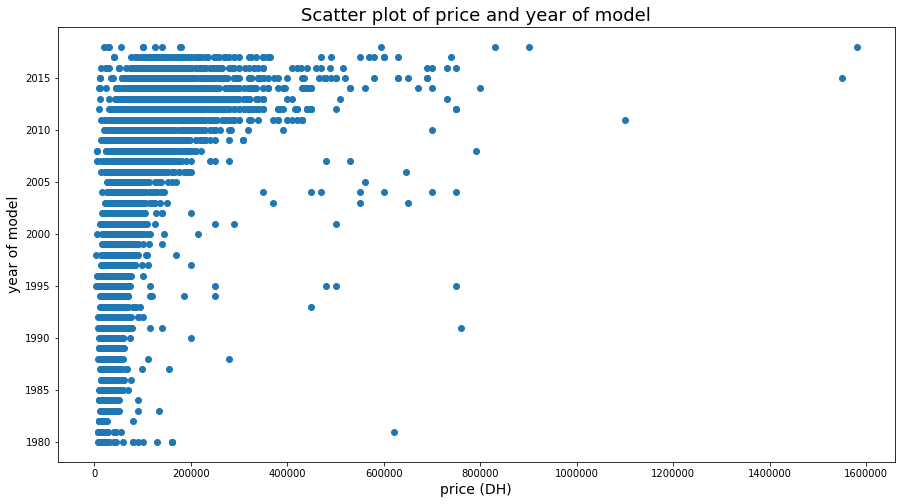

In [69]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))

# plot two values price per year_model
plt.scatter(df.price, df.year_model)
plt.xlabel("price (DH)", fontsize=14)
plt.ylabel("year of model", fontsize=14)
plt.title("Scatter plot of price and year of model",fontsize=18)
plt.show()

<center><h1>Model Creation</h1></center>